<div style="text-align: center;">

# Escuela Politecnica Nacional
## Tarea #10
</div

### Nombre: Erick Josue Mantuano Fernandez 


# Conjunto de ejercicios

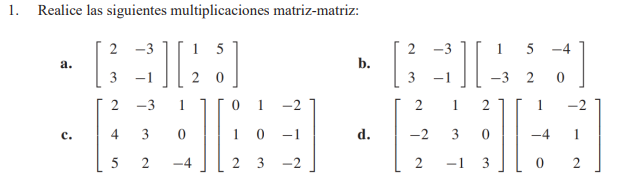

In [48]:
import numpy as np  # Importamos NumPy para trabajar con matrices

def definir_matriz(*filas):
    """Función para crear matrices a partir de listas de filas."""
    return np.array(filas)

def multiplicar_matrices(A, B):
    """Multiplica dos matrices y devuelve el resultado o un mensaje de error si las dimensiones no coinciden."""
    try:
        return np.dot(A, B)
    except ValueError:
        return "Error: Dimensiones incompatibles para la multiplicación."

# Diccionario de matrices
matrices = {
    'a': (definir_matriz([2, -3], [3, -1]), definir_matriz([1, 5], [2, 0])),
    'b': (definir_matriz([2, -3], [3, -1]), definir_matriz([1, 5, -4], [-3, 2, 0])),
    'c': (definir_matriz([2, -3, 1], [4, 3, 0], [5, 2, -4]), definir_matriz([0, 1, -2], [1, 0, -1], [2, 3, -2])),
    'd': (definir_matriz([2, 1, 2], [-2, 3, 0], [2, -1, 3]), definir_matriz([1, -2], [-4, 1], [0, 2]))
}

# Realizar multiplicaciones e imprimir resultados
for clave, (A, B) in matrices.items():
    resultado = multiplicar_matrices(A, B)
    print(f"\nResultado {clave}:")
    print(resultado if isinstance(resultado, str) else np.array2string(resultado, precision=2))



Resultado a:
[[-4 10]
 [ 1 15]]

Resultado b:
[[ 11   4  -8]
 [  6  13 -12]]

Resultado c:
[[ -1   5  -3]
 [  3   4 -11]
 [ -6  -7  -4]]

Resultado d:
[[ -2   1]
 [-14   7]
 [  6   1]]


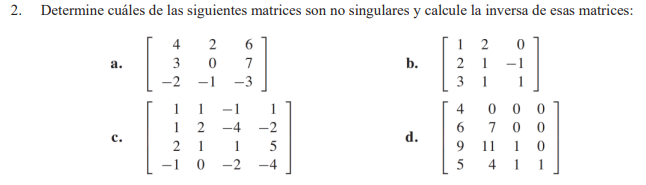

In [49]:
import numpy as np  # Importamos NumPy para operaciones con matrices

def definir_matriz(*filas):
    """Función para crear matrices a partir de listas de filas."""
    return np.array(filas)

# Definir las matrices con la función
matrices = {
    "A": definir_matriz([4, 2, 6], [3, 0, 7], [-2, -1, -3]),
    "B": definir_matriz([1, 2, 0], [2, 1, -1], [3, 1, 1]),
    "C": definir_matriz([1, 1, -1, 1], [1, 2, -4, -2], [2, 1, 1, 5], [-1, 0, -2, -4]),
    "D": definir_matriz([4, 0, 0, 0], [6, 7, 0, 0], [9, 11, 0, 0], [5, 4, 1, 1])
}

def verificar_inversa(nombre, matriz):
    """Verifica si una matriz es invertible e imprime su inversa si existe."""
    det = np.linalg.det(matriz)
    print(f"\nDeterminante de {nombre}: {det:.2f}")
    
    if not np.isclose(det, 0):
        inversa = np.linalg.inv(matriz)
        print(f"Inversa de {nombre}:\n{np.array2string(inversa, precision=2)}")
    else:
        print(f"La matriz {nombre} es singular y no tiene inversa.")

# Verificar todas las matrices
for nombre, matriz in matrices.items():
    verificar_inversa(nombre, matriz)



Determinante de A: 0.00
La matriz A es singular y no tiene inversa.

Determinante de B: -8.00
Inversa de B:
[[-0.25  0.25  0.25]
 [ 0.62 -0.12 -0.12]
 [ 0.12 -0.62  0.38]]

Determinante de C: 0.00
La matriz C es singular y no tiene inversa.

Determinante de D: 0.00
La matriz D es singular y no tiene inversa.


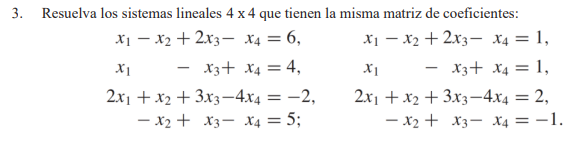

In [50]:
import numpy as np

def gauss_elimination(A, b):
    """Resuelve un sistema de ecuaciones lineales usando eliminación de Gauss."""
    A = A.astype(float)
    augmented_matrix = np.hstack((A, b.reshape(-1, 1)))
    n = len(b)

    print("Matriz aumentada inicial:\n", augmented_matrix, "\n")
    
    for i in range(n):
        if np.isclose(augmented_matrix[i, i], 0):
            raise ValueError("El sistema no tiene solución única o requiere pivoteo.")
        
        augmented_matrix[i] /= augmented_matrix[i, i]
        print(f"Haciendo 1 el pivote en la fila {i + 1}:\n", augmented_matrix, "\n")
        
        for j in range(i + 1, n):
            factor = augmented_matrix[j, i]
            augmented_matrix[j] -= factor * augmented_matrix[i]
            print(f"Eliminando la columna {i + 1} en la fila {j + 1}:\n", augmented_matrix, "\n")
    
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = augmented_matrix[i, -1] - np.dot(augmented_matrix[i, i + 1:n], x[i + 1:n])
    
    print("Solución final:\n", x)
    return x

A = np.array([
    [1, -1, 2, -1],
    [1,  0, -1,  1],
    [2,  1,  3, -4],
    [0, -1,  1, -1]
])

sistemas = {
    "Sistema 1": np.array([6, 4, -2, 5]),
    "Sistema 2": np.array([1, 1, 2, -1])
}

for nombre, b in sistemas.items():
    print(f"\nResolviendo {nombre}:")
    gauss_elimination(A, b)



Resolviendo Sistema 1:
Matriz aumentada inicial:
 [[ 1. -1.  2. -1.  6.]
 [ 1.  0. -1.  1.  4.]
 [ 2.  1.  3. -4. -2.]
 [ 0. -1.  1. -1.  5.]] 

Haciendo 1 el pivote en la fila 1:
 [[ 1. -1.  2. -1.  6.]
 [ 1.  0. -1.  1.  4.]
 [ 2.  1.  3. -4. -2.]
 [ 0. -1.  1. -1.  5.]] 

Eliminando la columna 1 en la fila 2:
 [[ 1. -1.  2. -1.  6.]
 [ 0.  1. -3.  2. -2.]
 [ 2.  1.  3. -4. -2.]
 [ 0. -1.  1. -1.  5.]] 

Eliminando la columna 1 en la fila 3:
 [[  1.  -1.   2.  -1.   6.]
 [  0.   1.  -3.   2.  -2.]
 [  0.   3.  -1.  -2. -14.]
 [  0.  -1.   1.  -1.   5.]] 

Eliminando la columna 1 en la fila 4:
 [[  1.  -1.   2.  -1.   6.]
 [  0.   1.  -3.   2.  -2.]
 [  0.   3.  -1.  -2. -14.]
 [  0.  -1.   1.  -1.   5.]] 

Haciendo 1 el pivote en la fila 2:
 [[  1.  -1.   2.  -1.   6.]
 [  0.   1.  -3.   2.  -2.]
 [  0.   3.  -1.  -2. -14.]
 [  0.  -1.   1.  -1.   5.]] 

Eliminando la columna 2 en la fila 3:
 [[ 1. -1.  2. -1.  6.]
 [ 0.  1. -3.  2. -2.]
 [ 0.  0.  8. -8. -8.]
 [ 0. -1.  1. -1.  5.]

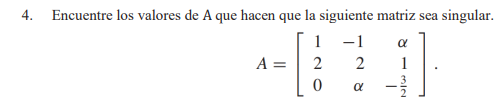

In [54]:
import sympy as sp

# Definir la variable simbólica alpha
alpha = sp.Symbol('alpha')

# Definir la matriz simbólica
A = sp.Matrix([
    [1, -1, alpha],
    [2,  2,  1],
    [0, alpha, -3/2]
])

# Calcular el determinante de la matriz
det_A = A.det()
print("Determinante de la matriz:", det_A, "\n")

# Resolver la ecuación determinante = 0 para encontrar valores singulares de alpha
singular_values = sp.solve(det_A, alpha)
print("Valores de alpha que hacen que la matriz sea singular:", singular_values)


Determinante de la matriz: 2*alpha**2 - alpha - 6.0 

Valores de alpha que hacen que la matriz sea singular: [-1.50000000000000, 2.00000000000000]


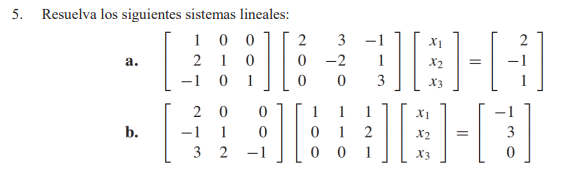

In [55]:
import numpy as np  # Importamos NumPy para trabajar con matrices y resolver sistemas lineales

def resolver_sistema(A, B, b, nombre):
    try:
        C = np.dot(A, B)  # Producto matricial de A y B
        x = np.linalg.solve(C, b)  # Resuelve el sistema C * x = b
        print(f"Solución del sistema {nombre}:")
        print(x, "\n")
        return x
    except np.linalg.LinAlgError:
        print(f"El sistema {nombre} no tiene solución única (matriz singular).\n")
        return None

# Definir matrices y vectores
sistemas = {
    "a": {
        "A": np.array([[1, 0, 0], [2, 1, 0], [-1, 0, 1]]),
        "B": np.array([[2, 3, -1], [0, -2, 1], [0, 0, 3]]),
        "b": np.array([2, -1, 1])
    },
    "b": {
        "A": np.array([[2, 0, 0], [-1, 1, 0], [3, 2, -1]]),
        "B": np.array([[1, 1, 1], [0, 1, 2], [0, 0, 1]]),
        "b": np.array([-1, 3, 0])
    }
}

# Resolver cada sistema
total_soluciones = {nombre: resolver_sistema(datos["A"], datos["B"], datos["b"], nombre) for nombre, datos in sistemas.items()}


Solución del sistema a:
[-3.  3.  1.] 

Solución del sistema b:
[ 0.5 -4.5  3.5] 



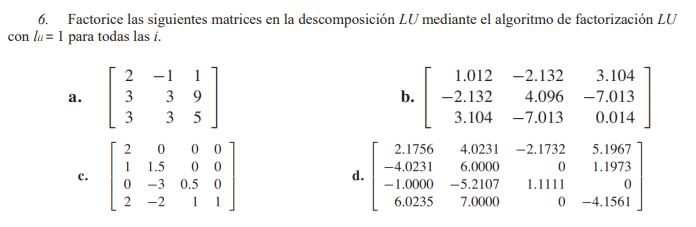

In [56]:
import numpy as np
from scipy.linalg import lu

def descomposicion_LU(matriz, nombre):
    """Realiza la descomposición LU de una matriz y muestra los resultados."""
    P, L, U = lu(matriz)
    print(f"\nMatriz {nombre}:\n", matriz)
    print("\nMatriz P (Permutación):\n", P)
    print("\nMatriz L (Lower triangular, con l_ii = 1):\n", L)
    print("\nMatriz U (Upper triangular):\n", U)

def main():
    matrices = {
        "A": np.array([[2, -1, 1], [3, 3, 9], [3, 3, 5]]),
        "B": np.array([[1.012, -2.132, 3.104], [-2.132, 4.096, -7.013], [3.104, -7.013, 0.014]]),
        "C": np.array([[2, 0, 0, 0], [1, 1.5, 0, 0], [0, -3, 0.5, 0], [2, -2, 1, 1]]),
        "D": np.array([[2.1756, 4.0231, -2.1732, 5.1967], [-4.0231, 6.0000, 0, 1.1973], [-1.0000, -5.2107, 1.1111, 0], [6.0235, 7.0000, 0, -4.1561]])
    }
    
    for nombre, matriz in matrices.items():
        descomposicion_LU(matriz, nombre)

if __name__ == "__main__":
    main()



Matriz A:
 [[ 2 -1  1]
 [ 3  3  9]
 [ 3  3  5]]

Matriz P (Permutación):
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]

Matriz L (Lower triangular, con l_ii = 1):
 [[ 1.          0.          0.        ]
 [ 0.66666667  1.          0.        ]
 [ 1.         -0.          1.        ]]

Matriz U (Upper triangular):
 [[ 3.  3.  9.]
 [ 0. -3. -5.]
 [ 0.  0. -4.]]

Matriz B:
 [[ 1.012 -2.132  3.104]
 [-2.132  4.096 -7.013]
 [ 3.104 -7.013  0.014]]

Matriz P (Permutación):
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]

Matriz L (Lower triangular, con l_ii = 1):
 [[ 1.          0.          0.        ]
 [-0.68685567  1.          0.        ]
 [ 0.32603093 -0.21424728  1.        ]]

Matriz U (Upper triangular):
 [[ 3.104      -7.013       0.014     ]
 [ 0.         -0.72091881 -7.00338402]
 [ 0.          0.          1.59897957]]

Matriz C:
 [[ 2.   0.   0.   0. ]
 [ 1.   1.5  0.   0. ]
 [ 0.  -3.   0.5  0. ]
 [ 2.  -2.   1.   1. ]]

Matriz P (Permutación):
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0

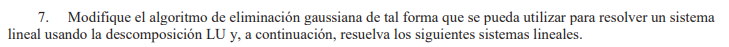



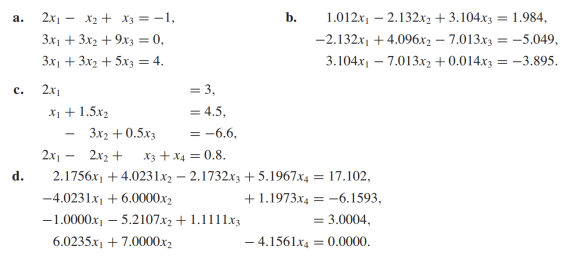

In [62]:
import numpy as np
from scipy.linalg import lu, solve_triangular

def descomponer_y_resolver(A, b, sistema): 


    print(f"\n--- Resolviendo el Sistema {sistema} ---")
 
    # Descomposición LU
    P, L, U = lu(A)

    # Mostrar las matrices obtenidas
    imprimir_matrices(P, L, U)

    # Paso 1: Resolver L * y = P.T * b
    y = resolver_triangulos(L, np.dot(P.T, b))
    print("\nSolución intermedia y (L * y = P.T * b):")
    print(y)

    # Paso 2: Resolver U * x = y
    x = resolver_triangulos(U, y)
    print("\nSolución final x (U * x = y):")
    print(x)

    return x

def resolver_triangulos(M, vector):
   
    return solve_triangular(M, vector, lower=(M.shape[0] == len(vector)))

def imprimir_matrices(P, L, U):

    print("\nMatriz de Permutación (P):")
    print(P)
    print("\nMatriz Triangular Inferior (L):")
    print(L)
    print("\nMatriz Triangular Superior (U):")
    print(U)

# Definir sistemas de ejemplo con sus respectivas matrices A y b

# Sistema A
A_1 = np.array([[2, -1, 1], [3, 3, 9], [3, 3, 5]])
b_1 = np.array([-1, 0, 4])

# Sistema B
A_2 = np.array([[1.012, -2.132, 3.104], [-2.132, 4.096, -7.013], [3.104, -7.013, 0.014]])
b_2 = np.array([1.984, -5.049, -3.895])

# Sistema C
A_3 = np.array([[2, 0, 0, 0], [1, 1.5, 0, 0], [0, -3, 0.5, 0], [2, -2, 1, 1]])
b_3 = np.array([3, 4.5, -6.6, 0.8])

# Sistema D
A_4 = np.array([[2.1756, 4.0231, -2.1732, 5.1967], [-4.0231, 6.0000, 0, 1.1973], [-1.0000, -5.2107, 1.1111, 0], [6.0235, 7.0000, 0, -4.1561]])
b_4 = np.array([17.102, -6.1593, 3.0004, 0.0])

# Resolver los sistemas y mostrar resultados
solucion_1 = descomponer_y_resolver(A_1, b_1, "A")
solucion_2 = descomponer_y_resolver(A_2, b_2, "B")
solucion_3 = descomponer_y_resolver(A_3, b_3, "C")
solucion_4 = descomponer_y_resolver(A_4, b_4, "D")



--- Resolviendo el Sistema A ---

Matriz de Permutación (P):
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]

Matriz Triangular Inferior (L):
[[ 1.          0.          0.        ]
 [ 0.66666667  1.          0.        ]
 [ 1.         -0.          1.        ]]

Matriz Triangular Superior (U):
[[ 3.  3.  9.]
 [ 0. -3. -5.]
 [ 0.  0. -4.]]

Solución intermedia y (L * y = P.T * b):
[ 0. -1.  4.]

Solución final x (U * x = y):
[ 0.          0.33333333 -1.        ]

--- Resolviendo el Sistema B ---

Matriz de Permutación (P):
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]

Matriz Triangular Inferior (L):
[[ 1.          0.          0.        ]
 [-0.68685567  1.          0.        ]
 [ 0.32603093 -0.21424728  1.        ]]

Matriz Triangular Superior (U):
[[ 3.104      -7.013       0.014     ]
 [ 0.         -0.72091881 -7.00338402]
 [ 0.          0.          1.59897957]]

Solución intermedia y (L * y = P.T * b):
[-3.895      -7.72430284  1.59897957]

Solución final x (U * x = y):
[-1.25483247 10.71452524  1.      